*Purpose:* The purpose of this script is to read a text file and produce a dictionary containing the frequency at which each unique word appears in the text file. Additionally, a bar graph containing the frequency of each word as an individual bar labeled by the respective word's index. The "word's index" refers to the index of the word in the list produced by inputting the dictionary of words and their frequencies into the '.keys()' function (e.g. list(my_dict.keys())). The following names the useful variables of interest in the script. 

*total_number_of_words*: The total number of words identified in the text file. This is the denominator for determining  frequencies of unique words. 

*word_dict*: The dictionary containing unique words as keys to the raw number of times they appear in the word list. 

*keylist*: A list of the keys in the dictionary *word_dict*. The index of each word in this list will match the index of its respective frequency in *freq_list*. 

*freq_list*: The list of frequencies of each unique word in the text file. The frequencies can be traced to their word by matching their index in *freq_list* to the same index in the *keylist* list of keys. 

*keymaxlist*: A list of the top 10 most frequent words in the text file.

*maxlist*: A list of the top 10 highest frequencies, where their index in this last matches the index of the word they refer to in *keymaxlist*. 

*minval*: This variable stores the lowest frequency among the list of frequencies with which each word appears. 

*lowestcountedkeys*: This list contains all of the words which appear with frequency *minval*. Because this value will presumably apply to all words which appear only once, and because more than 10 words are expected to appear only once in large documents, this will usually contain more than the "top 10" least frequent words. 




Imports the relevant modules and the text file we are working with as a list of lists, where each list contains all of the text in one line of the document

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# reading the text file
relevanttext= open(r'C:\Users\ehurt\Desktop\romeoandjuliet.txt')
lines = relevanttext.readlines()

Establishes two lists containing all characters which will be considered characters that could comprise a word. Notably, I am including the apostrophe as a non-letter character that might be in a word. 

In [ ]:
list_of_lowercase= ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','\'']
list_of_uppercase = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

Creates an empty list for storing all of the clusters of characters in the text file as separated by spaces. The for loop then populates the list by going through each line in "lines" and splitting it as described in the previous sentence. 

words_without_spaces = []

for item in lines:
    words_without_spaces.extend(item.split(' '))

Creates an empty list "fwordlist" to contain the words that will remain after the strings in 'words_without_spaces' are refined further to exclude non-letter characters. 

The following for loop itertes through each string in "words_without_spaces" and begins by creating a temporary "wordd" variable to store the string currently being processed. For each letter in that word, it creates a count of how many letters have been observed.

Then, if that letter is in the lowercase or uppercase alphabet, it appends the letter to our empty "wordd" string and adds one to the letter count. Otherwise, if for example the character being observed is an empty space, it determines whether any letters have been added to word by looking at the letter_count variable. If no letters have been added yet, it simply resets "wordd" to an empty string without adding the word to "fwordlist". 

If letters have been added (i.e. the letter_count variable is greater than zero), the "wordd" variable is added to the fwordlist list before being reset to an empty string, while the letter_count is reset to zero to move on to the next string. 

The next "if" statements further refine the "wordd" before it is added to fwordlist. If the length of the "wordd" variable is greater than zero, it removes apostrophes if they end the word (first if statement). If the word ends in "'s", the code assumes the word is possessive and removes the last two characters to produce the unique word (second if statement). Finally, the code removes apostrophes from the beginning of the word (third if statement).



fwordlist = []
for word in words_without_spaces:
        wordd = ''
        for letter in word:
            letter_count = 0
            if letter in list_of_lowercase or letter in list_of_uppercase:
                wordd = wordd+letter
                letter_count += 1
            else:
                 if letter_count == 0:
                     wordd = ''
                 else:
                    fwordlist.append(wordd)
                    wordd = ''
                    letter_count = 0
                    
        if len(wordd)> 0:
            if wordd[-1] == '\'':
                wordd = wordd[0:len(wordd)-1]
            if len(wordd) > 1 and wordd[-2] == "\'" and wordd[-1] == 's':
                wordd = wordd[0:len(wordd)-2]
            if len(wordd)>0 and wordd[0] == '\'':
                wordd = wordd[1:len(wordd)-1]
            fwordlist.append(wordd)

The following for loop filters out any residual empty strings and populates "final_word_list". 

In [ ]:
final_word_list = []

for item in fwordlist:
    if len(item) == 0:
        continue

    else:
        final_word_list.append(item)

The following code simply iterates through final_word_list and converts all words to fully lowercase words. 

In [ ]:
all_lowercase_wordlist = []
for item in final_word_list:
    all_lowercase_wordlist.append(item.lower())

Creates the denominator for determining the frequency of each word by counting up all of the words in the text file, as ideally represented by the length of "all_lowercase_wordlist"

In [ ]:
total_number_of_words = len(all_lowercase_wordlist)

Populates a dictionary with the raw count of how many times each word appears in the text file. 

In [ ]:
word_dict = {}

for item in all_lowercase_wordlist:
    if item not in word_dict:
        word_dict[item] = 1
    else:
        word_dict[item] +=1

Creates a list of the keys and a corresponding list of frequencies corresponding to each key to allow us to plot it later. 

In [ ]:
keylist = list(word_dict.keys())
freq_list = []
for item in keylist:
    freq = word_dict[item]/total_number_of_words
    freq_list.append(freq)

Plots the frequency of each word, with each number on the x axis representing the index of the word it's referring to in "keylist". 

In [ ]:
plt.figure()
plt.bar(list(range(len(freq_list))), freq_list)
plt.xlabel('Word Number')
plt.ylabel('Frequency')
plt.show()

The following code creates a copy of the list of frequencies generated previously in freq_list that we can remove items from without changing the original list. For 10 iterations, it takes the maximum value of value_copy, the copy of freq_list, finds its index in freq_list, then uses that index to find its respective word in keylist before this maximum value is removed, allowing the next highest value to be the new maximum value in the next iteration. 

To generate minimum values, the minimum frequency (which is 1 divided by the total number of words) is calculated and all words with that frequency are obtained from the original word_dict variable by dividing the raw counts by the total number of words. 

In [ ]:
maxlist = []
keymaxlist = []
value_copy = freq_list.copy()


while len(maxlist) < 10:
    max_i = (max(value_copy))
    max_ind = freq_list.index(max_i)
    maxlist.append(max_i)
    keymaxlist.append(keylist[max_ind])
    value_copy.remove(max_i)

minlist = []
keyminlist = []

while len(minlist) < 10:
    min_i = (min(value_copy))
    min_ind = freq_list.index(min_i)
    minlist.append(min_i)
    keyminlist.append(keylist[min_ind])
    value_copy.remove(min_i)

minval = min(value_copy)
lowestones = []
lowestcountedkeys = []
for i in keylist:
    if word_dict[i]/total_number_of_words == minval:
        lowestcountedkeys.append(i)

print(lowestcountedkeys)
print('done')

_NOTES_ 

The ten most frequent words are ['and', 'the', 'i', 'to', 'a', 'of', 'my', 'that', 'is', 'in']. The words that appear only once are ['tragedy', 'william', 'dramatis', 'gentlemen', 'grudge', 'loins', "cross'd", "misadventur'd", 'passage', "mark'd", 'continuance', 'traffic', 'patient', 'strive', 'sampson', 'gregory', 'swords', 'neck', 'moves', "runn'st", 'weakest', 'weaker', 'push', 'masters', 'abram', 'naked', 'frown', 'disgrace', 'side', 'swashing', 'heartless', 'clubs', 'flourishes', 'blade', 'spite', 'rebellious', 'enemies', 'profaners', 'stained', 'pernicious', 'purple', 'fountains', 'issuing', 'throw', 'mistempered', 'weapons', 'bred', 'thrice', "disturb'd", 'quiet', 'wield', 'streets', 'along', 'servants', 'fighting', 'instant', 'defiance', 'swung', "hiss'd", 'interchanging', 'parted', "worshipp'd", "peer'd", 'troubled', 'drave', 'grove', 'westward', 'rooteth', 'walking', 'ware', 'stole', 'covert', 'measuring', 'pursuing', "shunn'd", 'fled', 'augmenting', 'adding', 'cheering', 'furthest', 'east', 'bean', 'shady', 'curtains', 'aurora', 'steals', 'chamber', 'pens', 'artificial', 'portentous', 'humour', 'neither', "importun'd", 'sounding', 'bit', 'leaves', 'dedicate', 'willingly', 'step', 'seem', 'went', 'lengthens', 'tyrannous', 'muffled', 'pathways', 'fray', 'brawling', 'serious', 'chaos', 'feather', 'griefs', 'add', 'smoke', 'fume', 'sparkling', 'sea', "nourish'd", 'madness', 'choking', 'preserving', 'groan', 'sadly', "aim'd", 'soonest', 'dian', 'chastity', 'childish', 'bide', 'assailing', 'lap', 'seducing', 'sparing', 'huge', "starv'd", 'cuts', 'forsworn', 'liberty', 'question', 'masks', 'puts', 'strucken', 'treasure', "pass'd", 'penalty', 'reckoning', "liv'd", 'odds', 'saying', 'stranger', 'summers', 'wither', 'ripe', 'mothers', "marr'd", 'swallowed', 'hopes', 'hopeful', 'woo', 'scope', 'according', "accustom'd", 'whereto', 'invited', 'number', 'treading', "apparell'd", 'april', 'limping', 'winter', 'female', 'buds', 'inherit', "reck'ning", 'trudge', 'shoemaker', 'meddle', 'yard', 'fisher', 'pencil', 'writing', 'burns', 'lessoned', 'holp', 'cures', 'infection', 'rank', 'plantain', 'leaf', 'excellent', 'broken', 'kept', "whipp'd", 'tormented', 'gi', 'perhaps', 'learned', 'signio', 'martino', 'anselmo', 'widow', 'placentio', 'uncle', 'niece', 'valentio', 'lucio', 'lively', 'whither', 'crush', 'feast', 'sups', 'admired', 'beauties', 'unattainted', 'compare', 'swan', 'devout', 'religion', 'maintains', 'transparent', 'match', "pois'd", 'crystal', 'scales', 'shining', 'scant', 'splendour', 'maidenhead', 'twelve', 'year', 'bade', "rememb'red", 'teen', 'fortnight', 'odd', 'christian', 'earthquake', "wean'd", 'dovehouse', 'dug', 'tetchy', 'waddled', 'broke', 'dos', 'wil', 'crying', 'bump', "cock'rel", 'perilous', 'cried', "fall's", 'comest', 'stint', 'prettiest', 'babe', 'marr', 'seeks', 'delight', "obscur'd", 'margent', 'unbound', 'beautify', 'lacks', 'fish', 'clasps', 'grow', 'looking', 'liking', 'endart', "curs'd", 'everything', 'nights', 'six', 'speech', "hoodwink'd", 'bearing', 'tartar', 'painted', 'scaring', 'faintly', 'nimble', 'stakes', 'borrow', 'sore', 'enpierced', 'pitch', 'sink', 'pricks', 'visage', 'curious', 'quote', 'beetle', 'brows', 'sooner', 'betake', 'wantons', 'tickle', 'senseless', 'rushes', "proverb'd", 'grandsire', 'holder', 'game', 'dun', 'constable', 'reverence', 'wherein', 'waste', 'lights', 'lamps', 'dreamers', 'queen', 'bigger', 'agate', 'forefinger', 'team', 'athwart', 'noses', 'wagon', 'spokes', 'spinners', 'smallest', 'spider', 'moonshine', "wat'ry", 'cricket', 'coated', 'round', "prick'd", 'lazy', 'finger', 'chariot', 'joiner', 'squirrel', 'courtiers', 'cursies', 'lawyers', 'angry', 'blisters', 'breaths', 'sweetmeats', 'tainted', 'gallops', 'courtier', 'smelling', 'pig', 'tickling', 'parson', 'nose', 'sometimes', 'driveth', 'cutting', 'foreign', 'spanish', 'healths', 'fadom', 'drums', 'swears', 'plats', 'manes', 'horses', 'bakes', 'elflocks', 'untangled', 'learns', "talk'st", 'idle', 'begot', 'vain', 'thin', 'frozen', 'puffs', 'turning', 'dropping', 'wind', 'hanging', 'bitterly', 'revels', 'expire', 'steerage', 'direct', 'march', 'shift', 'scrape', "unwash'd", 'marchpane', 'porter', 'grindstone', "call'd", 'brisk', 'liver', "unplagu'd", 'corns', 'bout', 'whispering', 'tables', 'room', "by'r", 'thirty', 'nuptial', 'pentecost', 'ward', 'enrich', 'jewel', 'ethiop', 'snowy', 'dove', 'trooping', 'touching', 'forswear', "cover'd", 'antic', 'fleer', 'stock', 'solemnity', 'content', 'bears', 'portly', 'virtuous', "govern'd", 'wealth', 'semblance', 'fits', 'goodman', 'mend', 'mutiny', 'trick', 'scathe', 'contrary', 'perforce', 'wilful', 'choler', 'flesh', 'tremble', 'different', 'intrusion', 'convert', "bitt'rest", 'profane', 'unworthiest', 'blushing', 'wrong', 'mannerly', 'devotion', 'pilgrims', 'effect', 'trespass', 'sweetly', "nurs'd", 'trifling', 'banquet', 'waxes', 'follows', 'sprung', 'prodigious', 'rhyme', "danc'd", 'strangers', 'deathbed', 'gapes', "groan'd", 'bewitched', 'charm', 'bait', 'breathe', 'vows', 'beloved', 'passion', "temp'ring", 'extremities', 'extreme', 'lane', 'forward', 'centre', 'climbs', 'leaps', 'leapt', 'lov', 'nickname', 'purblind', 'adam', 'cophetua', 'heareth', 'stirreth', 'moveth', 'ape', 'forehead', 'quivering', 'demesnes', 'adjacent', 'twoul', 'letting', "conjur'd", 'consorted', 'humorous', 'befits', 'medlar', 'medlars', 'laugh', 'et', "pop'rin", 'jests', 'scars', 'livery', 'fools', 'fairest', 'twinkle', 'spheres', 'brightness', 'daylight', 'region', 'stream', 'birds', 'sing', 'leans', 'glove', 'glorious', 'winged', 'upturned', "wond'ring", 'mortals', 'bestrides', 'pacing', 'sails', 'refuse', 'belonging', 'smell', 'retain', 'perfection', 'doff', "bescreen'd", 'stumblest', 'enemy', 'walls', 'hard', 'considering', "o'erperch", 'limits', 'peril', 'cloak', 'direction', "found'st", 'prompt', 'vast', 'shore', 'farthest', 'adventure', 'mask', 'maiden', 'bepaint', 'farewell', 'jove', 'thinkest', 'haviour', 'impute', 'yielding', 'moon', 'tips', 'monthly', 'changes', 'circled', 'gracious', 'although', 'contract', 'ripening', "flow'r", 'repose', 'satisfaction', 'vow', 'request', "would'st", 'frank', 'bounty', 'boundless', 'bent', 'purpose', 'procure', 'perform', 'fortunes', 'throughout', 'meanest', 'suit', 'thrive', 'schoolboys', 'school', 'falconer', 'lure', 'bondage', 'cave', 'echo', 'repetition', 'tongues', 'softest', 'attending', "o'clock", "rememb'ring", 'forgetting', 'lets', 'hop', 'prisoner', 'twisted', 'thread', 'plucks', 'parting', 'crave', 'morn', 'frowning', "check'ring", 'eastern', 'streaks', 'flecked', 'darkness', 'drunkard', 'path', 'titan', 'advance', 'burning', 'dank', 'dew', 'fill', 'osier', 'cage', 'baleful', 'weeds', 'juiced', 'burying', 'divers', 'sucking', 'virtues', 'mickle', 'powerful', 'special', "strain'd", 'revolts', 'stumbling', 'virtue', 'vice', 'action', 'infant', 'rind', 'medicine', 'cheers', 'slays', 'senses', 'opposed', 'kings', 'encamp', 'canker', 'eats', 'saluteth', 'argues', 'distempered', 'lodges', 'unbruised', "unstuff'd", 'couch', 'earliness', "uprous'd", 'sweeter', 'wounded', 'physic', 'intercession', 'steads', 'homely', 'plainly', 'jesu', 'sallow', 'thrown', 'season', 'sighs', 'groans', 'stain', "chid'st", 'pupil', "bad'st", 'respect', 'assistant', 'alliance', 'households', 'rancour', 'stumble', 'hearted', 'torments', "stabb'd", 'pin', 'cleft', 'courageous', 'captain', 'rests', 'minim', 'third', 'butcher', 'punto', 'pox', 'affecting', 'tuners', 'b', 'tall', 'afflicted', 'ease', 'dried', 'numbers', 'flowed', 'kitchen', 'berhyme', 'dido', 'cleopatra', 'helen', 'hero', 'hildings', 'gray', 'bon', 'salutation', 'french', 'counterfeit', 'business', 'strain', 'yours', 'constrains', 'kindly', 'pump', 'single', 'singular', 'stretches', 'narrow', 'ell', 'stretch', 'added', 'proves', 'groaning', 'drivelling', 'runs', 'lolling', 'bauble', 'desirest', 'depth', 'occupy', 'argument', 'goodly', 'shirt', 'fan', 'bawdy', 'dial', 'fo', 'older', 'worst', 'confidence', 'endite', 'lenten', 'stale', 'hoar', 'walks', 'hoars', 'dinner', 'lustier', 'suffer', 'vexed', 'enquire', 'gross', 'gentlewoman', 'double', "off'red", 'gentlemanlike', "shriv'd", 'abbey', 'cords', 'tackled', 'topgallant', 'convoy', 'quit', 'putting', 'prating', 'nobleman', 'lieve', 'properer', 'clout', 'versal', 'rosemary', 'r', 'sententious', 'clock', "promis'", 'perchance', 'heralds', 'faster', 'glide', 'driving', "low'ring", "pinion'd", 'doves', 'highmost', 'bandy', 'feign', 'playing', 'bones', 'jaunce', 'leg', "din'd", 'sending', 'catch', 'jauncing', 'sorry', 'oddly', 'poultice', 'aching', 'messages', 'stays', "they'll", 'climb', 'bird', 'nest', 'countervail', 'devouring', 'triumph', 'confounds', 'arrives', 'tardy', 'lover', 'bestride', 'idles', 'thanks', "heap'd", 'skill', 'blazon', 'sweeten', 'neighbour', 'unfold', "imagin'd", 'receive', 'matter', 'beggars', 'incorporate', 'confines', 'claps', 'table', 'operation', 'jack', 'mood', 'moody', 'beard', 'cracking', 'hazel', 'beaten', 'addle', "quarrell'd", 'coughing', 'wakened', 'asleep', 'tailor', 'wearing', 'doublet', 'tying', 'shoes', 'tutor', 'couple', 'consortest', 'minstrels', 'haunt', 'coldly', 'budge', 'term', 'appertaining', "injur'd", 'dearly', 'alla', 'stoccata', 'carries', 'pitcher', 'forbear', 'expressly', 'bandying', 'twil', 'scratch', 'soundly', 'supported', 'reputation', "soft'ned", 'gallant', "aspir'd", 'fate', 'moe', 'furious', 'alive', 'respective', 'villai', 'gavest', 'staying', 'consort', 'doom', 'beginners', 'discover', 'unlucky', 'ours', 'began', 'nice', 'knees', 'humbly', 'truce', 'unruly', 'piercing', 'steel', 'martial', 'retorts', 'swifter', 'agile', "entertain'd", "to't", 'price', 'concludes', 'immediately', 'interest', 'brawls', 'amerce', 'loss', 'pleading', 'purchase', 'pardoning', 'footed', 'phoebus', 'phaeton', 'whip', 'cloudy', 'performing', 'runaway', 'leap', 'arms', "untalk'd", 'amorous', 'agrees', 'suited', 'lose', 'winning', "play'd", 'stainless', 'hood', "unmann'd", 'bating', 'mantle', 'acted', 'whiter', 'snow', 'raven', "brow'd", 'garish', 'bought', 'mansion', "possess'd", 'impatient', 'brings', 'heavenly', 'throws', 'wring', 'torment', 'torture', "roar'd", 'vowel', 'darting', 'sounds', 'weal', 'manly', "bedaub'd", 'swounded', 'dearer', 'dreadful', 'serpent', "flow'ring", 'dragon', 'beautiful', 'fiend', "feather'd", 'ravening', 'divinest', 'opposite', 'justly', 'bower', 'paradise', 'containing', 'deceit', 'gorgeous', 'honesty', 'aqua', "blister'd", 'brow', "asham'd", 'throne', 'monarch', 'universal', 'tributary', 'drops', 'belong', 'offer', 'deeds', 'sinners', 'needly', "rank'd", 'followed', 'modern', 'lamentation', 'rearward', 'following', 'wailing', 'wounds', 'theirs', 'highway', 'wot', 'affliction', "enanmour'd", 'wedded', 'acquaintance', 'doomsday', 'gentler', "vanish'd", 'hell', 'banished', 'calling', "cut'st", 'smilest', 'stroke', 'murders', "rush'd", "turn'd", 'seest', 'cat', 'courtship', 'white', 'blessing', 'thinking', 'sayest', 'banishe', 'howling', 'attends', 'mangle', 'armour', 'adversity', 'philosophy', 'displant', 'reverse', 'prevails', 'madmen', 'dispute', 'doting', 'unmade', 'heartsick', 'infold', 'simpleness', 'knocks', 'woeful', "blubb'ring", 'rise', 'spakest', "stain'd", 'childhood', "remov'd", "conceal'd", "cancell'd", 'level', "murder'd", 'acts', 'unreasonable', 'unseemly', 'woman', "amaz'd", 'railest', "abound'st", 'usest', 'bedeck', 'digressing', 'killing', "vow'd", 'ornament', 'skilless', 'afire', "dismemb'red", 'sake', 'lately', 'slewest', 'becomes', 'pack', 'blessings', 'courts', "misbhav'd", "pout'st", 'ascend', 'blaze', 'reconcile', "went'st", 'hasten', 'learning', 'grows', "disguis'd", 'sojourn', 'signify', 'chances', "fall'n", 'promise', 'abed', 'afford', 'tune', "mew'd", 'respects', 'nay', 'acquaint', 'revel', 'dozen', "pierc'd", 'pomegranate', 'herald', 'lace', 'severing', 'candles', 'jocund', 'tiptoe', 'misty', 'mountain', 'meteor', "need'st", 'yon', 'grey', 'reflex', 'cynthia', 'notes', 'vaulty', 'wills', 'straining', 'harsh', 'unpleasing', 'divideth', 'toad', 'voices', 'hunting', 'goeth', 'omit', 'convey', "think'st", 'discourses', 'divining', "renown'd", 'procures', 'couldst', "weep'st", 'miles', 'grieve', 'traitor', 'murderer', 'reach', 'venge', 'runagate', 'receipt', "nam'd", 'wreak', 'careful', 'sorted', 'expects', 'sets', 'drizzle', 'sunset', 'rains', "counterfeit'st", 'ebb', 'flow', 'bark', 'sailing', 'raging', 'tossed', 'delivered', 'worthy', 'minion', 'fettle', 'gains', 'drag', 'hurdle', 'sickness', 'reply', 'scarce', 'curse', 'smatter', 'mumbling', 'utter', 'gravity', 'bread', 'princely', 'nobly', "proportion'd", 'puling', 'whining', "i'l", 'graze', 'acknowledge', 'bethink', 'sees', 'delay', 'leaving', 'practise', 'soft', 'subject', 'challenge', 'dishclout', 'twer', 'comforted', 'marvellous', "displeas'd", 'wicked', 'dispraise', "prais'd", 'slow', 'slack', 'uneven', 'immoderately', 'counts', 'hastes', 'inundation', 'minded', 'certain', "abus'd", 'victory', "wrong'st", 'spake', "sland'red", 'evening', 'leisure', 'serves', 'pensive', 'shield', 'strains', 'compass', 'prorogue', 'prevent', 'resolution', "join'd", 'label', 'treacherous', "experienc'd", 'extremes', 'arbitrating', 'commission', 'issue', 'likely', "cop'st", 'battlements', 'thievish', 'serpents', 'chain', 'charnel', "o'ercover'd", 'rattling', 'reeky', 'shanks', 'yellow', 'chapless', "unstain'd", 'distilled', 'liquor', 'veins', 'drowsy', 'testify', 'roses', 'paly', 'windows', "depriv'd", 'supple', 'stiff', 'stark', 'shrunk', 'continue', 'awake', 'pleasant', 'manner', 'country', 'robes', 'uncovered', 'borne', 'toy', 'womanish', 'abate', 'acting', 'invite', 'cook', "unfurnish'd", 'peevish', "will'd", 'harlotry', 'prostrate', 'knot', 'knit', 'becomed', 'stepping', 'bounds', "as't", 'reverend', 'sort', 'needful', 'furnish', 'deck', 'housewife', 'wondrous', 'wayward', 'girl', 'attires', "cull'd", 'behooffull', 'faint', 'thrills', 'freezes', 'heat', 'mixture', 'subtilly', "minist'red", 'tried', 'entertain', 'redeem', 'stifled', 'healthsome', 'breathes', 'strangled', 'horrible', 'conceit', 'together', 'ancestors', "fest'ring", 'spirits', 'shrieks', 'mandrakes', 'torn', 'environed', 'hideous', 'madly', 'forefathers', 'club', 'dash', 'seeking', 'spit', 'keys', 'dates', 'quinces', 'cock', 'curfew', 'bell', "bak'd", 'spare', "watch'd", 'lesser', 'hunt', 'watching', 'spits', 'logs', 'waken', 'trim', 'chat', 'pennyworths', 'fright', 'weraday', "ta'en", 'ties', 'bride', 'deflowered', 'miserable', 'lasting', 'labour', 'solace', "catch'd", 'uncomfortable', 'confusion', 'eternal', 'stick', 'custom', 'array', 'bids', 'ordained', 'office', 'melancholy', 'burial', 'solemn', 'hymns', 'dirges', 'corse', "low'r", 'crossing', 'manent', 'pipes', 'plays', 'm', 'whe', 'griping', 'doleful', 'dumps', 'simon', 'hugh', 'james', 'speedy', 'lend', 'pestilent', 'tarry', 'flattering', 'truth', 'presage', 'sits', 'lightly', 'lifts', 'cheerful', 'fares', 'capel', 'angels', 'low', 'bringing', 'ink', 'thoughts', 'hereabouts', "tatt'red", 'overwhelming', 'culling', 'meagre', 'misery', 'tortoise', 'alligator', 'shaped', 'beggarly', 'account', 'earthen', 'musty', 'remnants', 'cakes', 'thinly', 'noting', 'sale', 'caitiff', 'forerun', 'dram', 'speeding', 'disperse', 'taker', 'mall', 'trunk', "discharg'd", 'violently', 'hasty', 'hurry', 'cannon', 'utters', 'fearest', 'famine', 'starveth', 'contempt', 'beggary', 'affords', 'liquid', 'dispatch', 'worse', 'compounds', 'food', 'thyself', 'cordial', 'john', 'franciscan', 'barefoot', 'associate', 'visiting', 'finding', 'searchers', 'suspecting', 'infectious', 'pestilence', "seal'd", 'speed', 'unhappy', 'neglecting', 'notice', 'holding', 'digging', 'signal', 'afraid', 'canopy', 'dust', "distill'd", 'warning', 'wanders', 'muffle', 'balthasar', 'wrenching', 'deliver', "whate'er", 'hearest', 'interrupt', 'descend', 'partly', 'chiefly', 'thence', 'intend', 'joint', 'hungry', 'fierce', 'inexorable', 'tigers', "gorg'd", 'dearest', 'morsel', 'enforce', 'rotten', 'jaws', 'despite', 'cram', 'opens', 'haughty', 'supposed', 'villanous', 'unhallowed', 'tempt', 'fly', 'affright', 'urging', "arm'd", 'hereafter', 'felon', 'provoke', 'peruse', 'betossed', 'triumphant', "slaught'red", 'keepers', 'lightning', 'ensign', 'crimson', 'flag', 'advanced', 'liest', 'sunder', 'unsubstantial', 'lean', 'abhorred', 'monster', 'palace', 'shake', 'yoke', 'inauspicious', 'wearied', 'doors', 'righteous', 'dateless', 'bargain', 'engrossing', 'unsavoury', 'dashing', 'rocks', 'seasick', 'francis', 'feet', 'stumbled', 'vainly', 'grubs', 'eyeless', 'burneth', 'capels', 'fearfully', 'menace', 'unthrifty', 'entrance', 'masterless', 'gory', "discolour'd", 'enters', "steep'd", 'unkind', 'comfortable', 'unnatural', 'greater', 'thwarted', 'dispose', 'sisterhood', 'timeless', 'friendly', 'haply', 'snatches', 'stabs', "whoe'er", 'whereon', 'circumstance', 'safety', 'spade', 'misadventure', 'person', 'shriek', 'people', 'street', 'startles', 'murder', 'missheathed', 'warns', "stopp'd", 'conspires', 'outrage', 'clear', 'lead', 'mischance', 'slave', 'parties', 'direful', 'impeach', "betroth'd", 'devise', 'rid', 'tutored', 'sleeping', 'wrought', 'dire', 'potion', 'force', "return'd", 'prefixed', 'meaning', 'closely', 'conveniently', 'entreated', 'scare', 'violence', 'miscarried', 'rigour', 'severest', 'brought', 'departed', 'anon', 'course', 'writes', 'scourge', 'winking', 'brace', 'statue', 'whiles', 'figure', 'sacrifices', 'glooming', 'story'] 



The most frequent words are articles and small words frequently used in the English language, so they are expected to have high frequency. The raw number of words that only appear once is high and indicates that Shakespeare had a diverse vocabulary, rarely using a word more than once.

*The following is a picture of the bar graph described earlier in this notebook entry contianing the frequencies of each word's appearance in the text file.*  

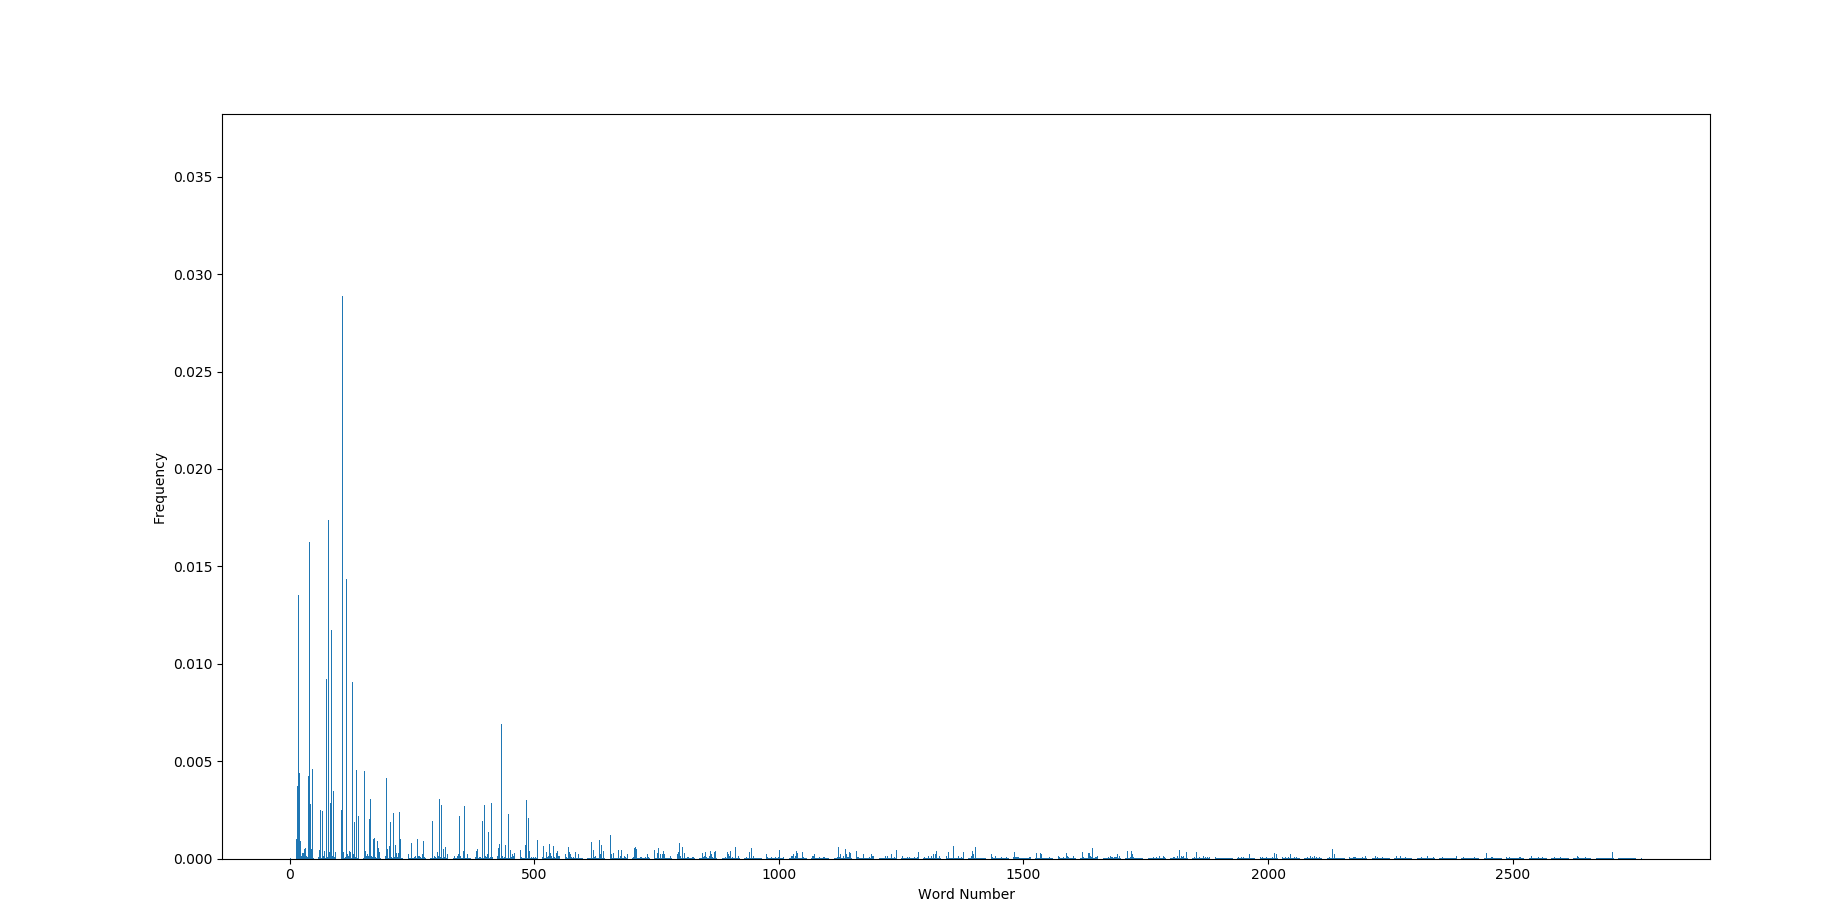